In [1]:
# Reference results for comparison
# reference_results = [17.80, 14.80, 13.60, 12.75, 12.25, 11.75, 11.25, 11.00, 10.70]
reference_results = [17.633, 14.8, 13.527, 12.755, 12.165, 11.687, 11.283, 10.925, 10.581]

# 途中経過表示


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from main import create_users, simulate_transmission, PRINT_MODE

# パラメータ
rate = 24  # Mbps
duration = 60  # seconds
mode = 'a'  # Transmission mode
n_values = [1, 10, 20, 30, 40, 50, 60, 70, 80]
num_simulations = 10  # 各nでのシミュレーション回数

# 結果を格納
n_list = []
average_rates = []

# 異なるユーザー数でシミュレーションを実行
for n in n_values:
    rates = []  # このnでの各シミュレーションの結果を保存
    print(n)
    for _ in range(num_simulations):
        users = create_users(n)
        total_data_transmitted = simulate_transmission(users, duration, rate, output_mode=PRINT_MODE[2], mode=mode)
        rates.append(total_data_transmitted)
    # 平均値を計算
    mean_rate = np.mean(rates)
    n_list.append(n)
    average_rates.append(mean_rate)

# 正解率を計算
accuracy = [
    (sim_result / ref_result) * 100
    for sim_result, ref_result in zip(average_rates, reference_results)
]

# 正解率を出力
for n, acc, ref, ave in zip(n_values, accuracy, reference_results, average_rates):
    print(f"n={n} (reference : {ref}, average : {ave:.4f} ) : Accuracy = {acc:.4f}%")

# スムーズな曲線を生成
n_array = np.array(n_list)
rate_array = np.array(average_rates)

n_smooth = np.linspace(n_array.min(), n_array.max(), 500)  # スムーズなnの範囲を生成
# smooth_rate = make_interp_spline(n_array, rate_array)(n_smooth)  # 補間を計算
smooth_rate = make_interp_spline(n_array, reference_results)(n_smooth)  # 補間を計算

# 結果をプロット
plt.figure(figsize=(10, 6))
plt.ylim(0, 20)
plt.xlim(0, 80)

# 平均値とスムーズな曲線をプロット
plt.plot(n_list, average_rates, marker='o', label="Average Data", color='blue')

# 正解値を別のマーカーでプロット
plt.scatter(n_values, reference_results, color='red', marker='x', label="Reference Results")
plt.plot(n_smooth, smooth_rate, linestyle='--', label="Smoothed Curve")


plt.title("Average Transmission Rate vs. Number of Users")
plt.xlabel("Number of Users (n)")
plt.ylabel("Average Transmission Rate (Mbps)")
plt.grid(True)
plt.legend()
plt.show()

# 進行度のみ


Number of Users:   0%|          | 0/9 [00:00<?, ?it/s]

Simulations for n=1:   0%|          | 0/2 [00:00<?, ?it/s]

Simulations for n=10:   0%|          | 0/2 [00:00<?, ?it/s]

Simulations for n=20:   0%|          | 0/2 [00:00<?, ?it/s]

Simulations for n=30:   0%|          | 0/2 [00:00<?, ?it/s]

Simulations for n=40:   0%|          | 0/2 [00:00<?, ?it/s]

Simulations for n=50:   0%|          | 0/2 [00:00<?, ?it/s]

Simulations for n=60:   0%|          | 0/2 [00:00<?, ?it/s]

Simulations for n=70:   0%|          | 0/2 [00:00<?, ?it/s]

Simulations for n=80:   0%|          | 0/2 [00:00<?, ?it/s]

n=1 (reference : 17.633, average : 17.7848 ) : Accuracy = 100.8609%
n=10 (reference : 14.8, average : 14.9442 ) : Accuracy = 100.9746%
n=20 (reference : 13.527, average : 13.7311 ) : Accuracy = 101.5089%
n=30 (reference : 12.755, average : 12.9736 ) : Accuracy = 101.7140%
n=40 (reference : 12.165, average : 12.4372 ) : Accuracy = 102.2378%
n=50 (reference : 11.687, average : 11.9910 ) : Accuracy = 102.6013%
n=60 (reference : 11.283, average : 11.6382 ) : Accuracy = 103.1483%
n=70 (reference : 10.925, average : 11.2943 ) : Accuracy = 103.3800%
n=80 (reference : 10.581, average : 11.0200 ) : Accuracy = 104.1488%


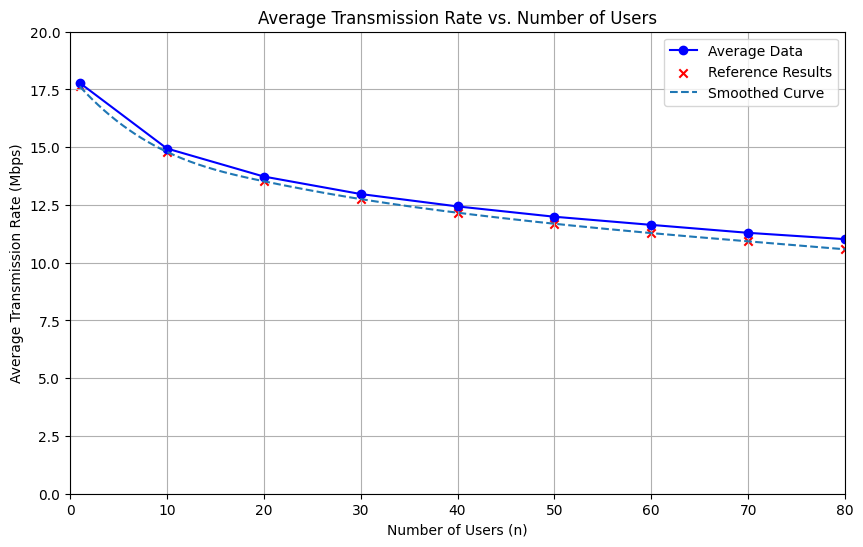

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from tqdm.notebook import tqdm
from main import create_users, simulate_transmission, PRINT_MODE

# パラメータ
rate = 24  # Mbps
duration = 60  # seconds
mode = 'a'  # Transmission mode
n_values = [1, 10, 20, 30, 40, 50, 60, 70, 80]
num_simulations = 2  # 各nでのシミュレーション回数

# 結果を格納
n_list = []
average_rates = []

# 異なるユーザー数でシミュレーションを実行
for n in tqdm(n_values, desc="Number of Users"):  # 外側のループにtqdmを追加
    rates = []  # このnでの各シミュレーションの結果を保存
    for _ in tqdm(range(num_simulations), desc=f"Simulations for n={n}", leave=False):  # 内側のループにtqdmを追加
        users = create_users(n)
        total_data_transmitted = simulate_transmission(users, duration, rate, output_mode=PRINT_MODE[3], mode=mode)
        rates.append(total_data_transmitted)
    # 平均値を計算
    mean_rate = np.mean(rates)
    n_list.append(n)
    average_rates.append(mean_rate)

# 正解率を計算
accuracy = [
    (sim_result / ref_result) * 100
    for sim_result, ref_result in zip(average_rates, reference_results)
]

# 正解率を出力
for n, acc, ref, ave in zip(n_values, accuracy, reference_results, average_rates):
    print(f"n={n} (reference : {ref}, average : {ave:.4f} ) : Accuracy = {acc:.4f}%")

# スムーズな曲線を生成
n_array = np.array(n_list)
rate_array = np.array(average_rates)

n_smooth = np.linspace(n_array.min(), n_array.max(), 500)  # スムーズなnの範囲を生成
smooth_rate = make_interp_spline(n_array, reference_results)(n_smooth)  # 補間を計算

# 結果をプロット
plt.figure(figsize=(10, 6))
plt.ylim(0, 20)
plt.xlim(0, 80)

# 平均値とスムーズな曲線をプロット
plt.plot(n_list, average_rates, marker='o', label="Average Data", color='blue')

# 正解値を別のマーカーでプロット
plt.scatter(n_values, reference_results, color='red', marker='x', label="Reference Results")
plt.plot(n_smooth, smooth_rate, linestyle='--', label="Smoothed Curve")


plt.title("Average Transmission Rate vs. Number of Users")
plt.xlabel("Number of Users (n)")
plt.ylabel("Average Transmission Rate (Mbps)")
plt.grid(True)
plt.legend()
plt.show()


# Load csv


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
from matplotlib import rcParams
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf: Times New Roman:style=Regular,Normal,obyčejné,Standard,Κανονικά,Normaali,Normál,Normale,Standaard,Normalny,Обычный,Normálne,Navadno,thường,Arrunta'
times_new_roman = fm.FontProperties(fname=font_path)

# Load CSV file
def load_csv(file_path):
    return pd.read_csv(file_path)

# Process data from CSV
input_file = './out/out_102_751.csv'
data = load_csv(input_file)

# Extract user counts (column headers) and simulation results
n_values = [int(col) for col in data.columns]  # Use all columns
results = data.values  # Extract data as NumPy array


# Calculate mean and standard deviation for each user count
means = np.mean(results, axis=0)
std_devs = np.std(results, axis=0)

# Calculate accuracy
accuracy = [(sim_result / ref_result) * 100 for sim_result, ref_result in zip(means, reference_results)]

# Display accuracy
for n, acc, ref, ave in zip(n_values, accuracy, reference_results, means):
    print(f"n={n} (reference: {ref}, average: {ave:.4f}): Accuracy = {acc:.4f}%")

# Smooth data for visualization
n_array = np.array(n_values)
n_smooth = np.linspace(n_array.min(), n_array.max(), 500)
smooth_means = make_interp_spline(n_array, means)(n_smooth)
smooth_reference = make_interp_spline(n_array, reference_results)(n_smooth)

# Plot results
plt.figure(figsize=(10, 6))
plt.ylim(0, 20)
plt.xlim(0, 80)

# rcParams['font.family'] = 'Times New Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# Plot average data with error bars
plt.plot(n_values, means, marker='o', label='Simulation Data', color='blue')

# Plot reference results
plt.scatter(n_values, reference_results, color='red', marker='x', label='Reference Results')
plt.plot(n_smooth, smooth_reference, linestyle='--', label='Smoothed Reference Curve')


# plt.title('Simulation Results: Total Data Transmitted vs. Number of Users')
plt.xlabel('Number of Users (n)', fontproperties=times_new_roman)
plt.ylabel('Total Data Transmitted (Mbps)', fontproperties=times_new_roman)
# plt.grid(True)
plt.legend()
plt.show()

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


n=1 (reference: 17.633, average: 17.5760): Accuracy = 99.6766%
n=10 (reference: 14.8, average: 14.7486): Accuracy = 99.6529%
n=20 (reference: 13.527, average: 13.5512): Accuracy = 100.1792%
n=30 (reference: 12.755, average: 12.8189): Accuracy = 100.5013%
n=40 (reference: 12.165, average: 12.2772): Accuracy = 100.9222%
n=50 (reference: 11.687, average: 11.8428): Accuracy = 101.3332%
n=60 (reference: 11.283, average: 11.4764): Accuracy = 101.7141%
n=70 (reference: 10.925, average: 11.1571): Accuracy = 102.1248%
n=80 (reference: 10.581, average: 10.8720): Accuracy = 102.7505%


FileNotFoundError: [Errno 2] No such file or directory: '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf: Times New Roman:style=Regular,Normal,obyčejné,Standard,Κανονικά,Normaali,Normál,Normale,Standaard,Normalny,Обычный,Normálne,Navadno,thường,Arrunta'

<Figure size 1000x600 with 1 Axes>

n=1 (reference: 17.633, average: 12.2353): Accuracy = 69.3888%
n=10 (reference: 14.8, average: 16.6037): Accuracy = 112.1870%
n=20 (reference: 13.527, average: 16.2123): Accuracy = 119.8517%
n=30 (reference: 12.755, average: 15.7513): Accuracy = 123.4910%
n=40 (reference: 12.165, average: 15.3414): Accuracy = 126.1107%
n=50 (reference: 11.687, average: 14.9553): Accuracy = 127.9656%
n=60 (reference: 11.283, average: 14.6283): Accuracy = 129.6491%
n=70 (reference: 10.925, average: 14.3188): Accuracy = 131.0643%
n=80 (reference: 10.581, average: 14.0403): Accuracy = 132.6940%


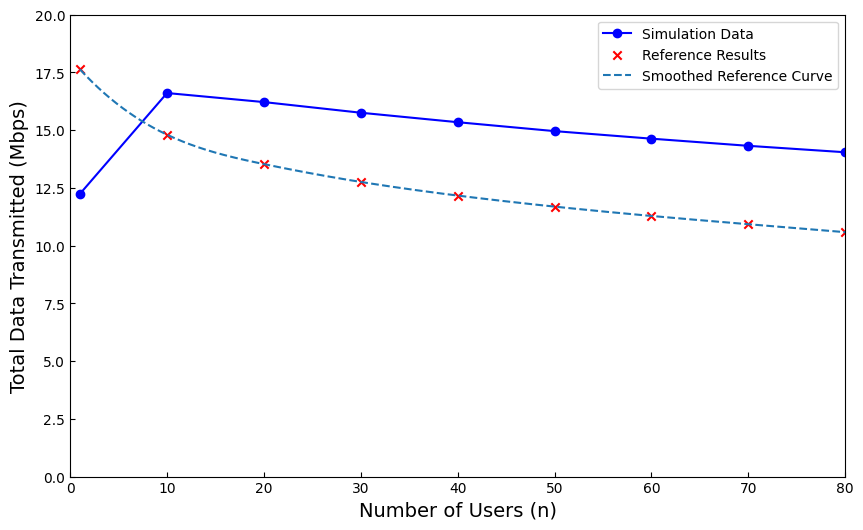

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.font_manager as fm

# フォント設定
# font_path = '/usr/share/fonts/truetype/msttcorefonts/times.ttf'  # 正しいパスを指定
# times_new_roman = fm.FontProperties(fname=font_path)

# CSVファイルの読み込み関数
def load_csv(file_path):
    return pd.read_csv(file_path)

# 入力ファイルパス
input_file = './out/out.csv'
data = load_csv(input_file)

# ユーザー数（列ヘッダー）とシミュレーション結果を抽出
n_values = [int(col) for col in data.columns]  # ヘッダーを整数に変換
results = data.values  # データをNumPy配列として取得

# リファレンス結果を定義 (例として作成)
reference_results = [17.633, 14.8, 13.527, 12.755, 12.165, 11.687, 11.283, 10.925, 10.581]

# 平均と標準偏差を計算
means = np.mean(results, axis=0)
std_devs = np.std(results, axis=0)

# 精度を計算
accuracy = [(sim_result / ref_result) * 100 for sim_result, ref_result in zip(means, reference_results)]

# 精度を表示
for n, acc, ref, ave in zip(n_values, accuracy, reference_results, means):
    print(f"n={n} (reference: {ref}, average: {ave:.4f}): Accuracy = {acc:.4f}%")

# データをスムーズ化
n_array = np.array(n_values)
n_smooth = np.linspace(n_array.min(), n_array.max(), 500)
smooth_means = make_interp_spline(n_array, means)(n_smooth)
smooth_reference = make_interp_spline(n_array, reference_results)(n_smooth)

# プロット
plt.figure(figsize=(10, 6))
plt.ylim(0, 20)
plt.xlim(0, 80)

# 軸目盛りの設定
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# 平均データをプロット（エラーバー付き）
plt.plot(n_values, means, marker='o', label='Simulation Data', color='blue')

# リファレンス結果をプロット
plt.scatter(n_values, reference_results, color='red', marker='x', label='Reference Results')
plt.plot(n_smooth, smooth_reference, linestyle='--', label='Smoothed Reference Curve')

# タイトルとラベル
plt.xlabel('Number of Users (n)', fontsize=14)
plt.ylabel('Total Data Transmitted (Mbps)', fontsize=14)

# 凡例と表示
plt.legend()
plt.show()


![img](./test/Untitled.png)


In [ ]:
[17.5, 14.9, 13.25, 12.6, 12.3, 12.0, 11.25, 11.0]

# ポアソン分布$P(X = k) = e^{- \lambda}\frac{\lambda^{k}}{k!}$

ポアソン分布$P_o(\lambda)$の平均は$\lambda$,分散は$\lambda$(等しい)


In [ ]:
import numpy as np
import math

def poisson(lam, k):
    return np.exp(-lam) * (lam**k) / (math.factorial(k))


def poisson_distribution(lam, k):
    ans = 0
    for number in range(k):
        # print(number)
        ans += poisson(lam, k)
    return ans

print(poisson_distribution(6, 2))